## Logistic Regression

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from pca import PCA
import argparse
import network
import os, random, sys
from data import traffic_sign, generate_k_fold_set,generate_no_fold_set, onehot_encode,onehot_decode,z_score_normalize
from model.logistic import LogisticRegression


#Q5 - (b) - Evaluate the model on Speed limit 100km/h vs 120km/h using the unaligned dataset

(34799, 1024) (34799,)
FOLDWIDTH: 255


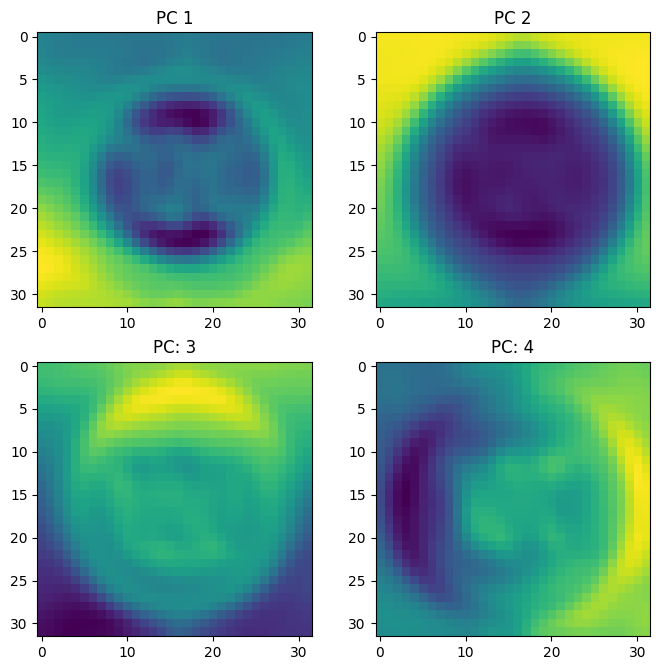

In [23]:
#unlined dataset - pca looks pretty bad.
#change data only for 100km/h(class7) and 120km/h(class8)
n_components = 100
load_data = traffic_sign(False) # check true and false



load_data_binary = select_binarydata(load_data,7,8)
#data splits 80/10/10
train_data, train_label, valid_data, valid_label, test_data, test_label = generate_no_fold_set(load_data_binary,10)
#data normalize
train_data_normalized = train_data.astype(np.float32) # cast to float32 as float64 running out of memory
train_data_normalized = z_score_normalize(train_data) 

pca = PCA(n_components)
projected = pca.fit_transform(train_data)
pca.plot_PC()


 best test accuracy : 0.8784313725490196


Text(0.5, 1.0, 'accuracy')

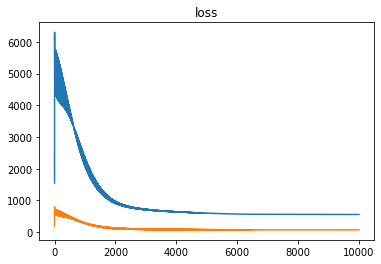

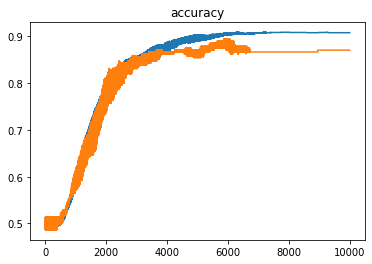

In [77]:
#train 50 epochs as opposed to 300
#learning rate
train_loss_record = []
train_accuracy_record = []
holdout_loss_record = []
holdout_accuracy_record = []
test_accuracy_record = []

train_l = np.copy(train_label)//8 # 7 or 8
valid_l = np.copy(valid_label)//8 # 7 or 8
test_l = np.copy(test_label)//8 # 7 or 8

Alpha = 0.01
w = np.random.rand(n_components + 1)
logistic = LogisticRegression(Alpha)
#weight
train_d = projected 
valid_d = pca.transform(valid_data)
test_d = pca.transform(test_data)

for epoch in range(10000):
    #logistic model 
    train_y = logistic.logistic_model(w, train_d)
    #loss check
    train_loss = logistic.loss_binary(train_y, train_l)
    #gradient check
    train_loss_record.append(train_loss)
    train_accuracy = logistic.check_accuracy(train_y, train_l)
    train_accuracy_record.append(train_accuracy)
    #process for validation sets only checking the accuray, not updating the weight
    holdout_y = logistic.logistic_model(w,valid_d)
    holdout_loss = logistic.loss_binary(holdout_y, valid_l)
    holdout_accuracy = logistic.check_accuracy(holdout_y, valid_l)
    holdout_loss_record.append(holdout_loss)
    holdout_accuracy_record.append(holdout_accuracy)
    #evaluate best option for test sets
    
    if holdout_accuracy >= max(holdout_accuracy_record):
        best_w = w
        test_y = logistic.logistic_model(best_w, test_d)
        test_accuracy = logistic.check_accuracy(test_y, test_l)
    
    #update the weight
    w = logistic.update_weight(w, train_d, train_y, train_l)
    
    #print(f' train accuracy, loss: {train_accuracy, train_loss }')
    
print(f' best test accuracy : {test_accuracy }')
#plot result
plt.figure(1)
plt.plot(train_loss_record)
plt.plot(holdout_loss_record)
plt.title("loss")

plt.figure(2)
plt.plot(train_accuracy_record)
plt.plot(holdout_accuracy_record)
plt.title("accuracy")


#Q5 - (c) - Evaluate the model on Speed limit 100km/h vs 120km/h using the aligned dataset

In [101]:
import numpy as np
import matplotlib.pyplot as plt
from pca import PCA
import argparse
import network
import os, random, sys
from data import traffic_sign, generate_k_fold_set,generate_no_fold_set, onehot_encode,onehot_decode,z_score_normalize
from model.logistic import LogisticRegression

#unlined dataset - pca looks pretty bad.
#change data only for 100km/h(class7) and 120km/h(class8)
n_components = 100
load_data = traffic_sign(True) # check true and false
load_data_binary = select_binarydata(load_data,7,8)
#data normalize
'''
train_data_normalized = train_data.astype(np.float32) # cast to float32 as float64 running out of memory
train_data_normalized = z_score_normalize(train_data) 
'''

(34799, 1024) (34799,)


'\ntrain_data_normalized = train_data.astype(np.float32) # cast to float32 as float64 running out of memory\ntrain_data_normalized = z_score_normalize(train_data) \n'

**********


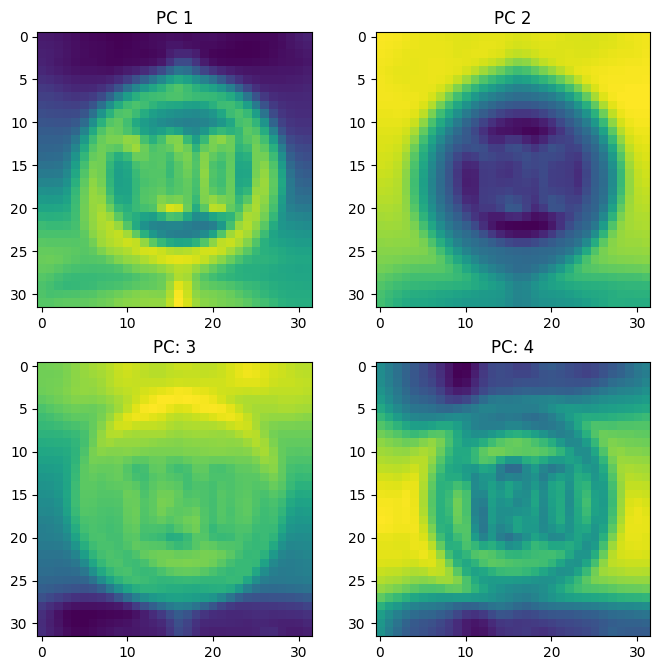

 epoch: 50, train accuracy: 0.515686274509804
 epoch: 100, train accuracy: 0.5769607843137254
 epoch: 150, train accuracy: 0.640686274509804
 epoch: 200, train accuracy: 0.6901960784313725
 epoch: 250, train accuracy: 0.7323529411764705
 epoch: 300, train accuracy: 0.7696078431372549
 epoch: 500, train accuracy: 0.8504901960784313
 best test accuracy : 0.8509803921568627
**********
 epoch: 50, train accuracy: 0.6745098039215687
 epoch: 100, train accuracy: 0.7151515151515152
 epoch: 150, train accuracy: 0.746524064171123
 epoch: 200, train accuracy: 0.7732620320855615
 epoch: 250, train accuracy: 0.7982174688057041
 epoch: 300, train accuracy: 0.8185383244206773
 epoch: 500, train accuracy: 0.8741532976827094
 best test accuracy : nan
**********
 epoch: 50, train accuracy: 0.7705882352941177
 epoch: 100, train accuracy: 0.7859477124183006
 epoch: 150, train accuracy: 0.8022875816993464
 epoch: 200, train accuracy: 0.8218954248366013
 epoch: 250, train accuracy: 0.8375816993464053
 epoc

In [102]:
#train 50 epochs as opposed to 300
#learning rate
train_loss_record = []
train_accuracy_record = []
holdout_loss_record = []
holdout_accuracy_record = []
test_accuracy_record = []
Alpha = 0.001
n_components = 100

w = np.random.rand(n_components + 1)
logistic = LogisticRegression(Alpha)
epochs_print = [50, 100, 150, 200, 250, 300,500]
epochs = 500
#fold sets add
first_plot = True
for train, valid, test in generate_k_fold_set((load_data_binary)):
    print("**********")
    train_loss_record = []
    train_accuracy_record = []
    holdout_loss_record = []
    holdout_accuracy_record = []
    
    #first_plot = True
    train_data, train_label = train
    valid_data, valid_label = valid
    test_data, test_label = test

    pca = PCA(n_components)
    projected = pca.fit_transform(train_data)
    #plot first principle component
    if first_plot == True : 
        pca.plot_PC()
        first_plot = False
    train_d = projected     
    valid_d = pca.transform(valid_data)
    test_d = pca.transform(test_data)
    train_l = np.copy(train_label)//8
    valid_l = np.copy(valid_label)//8
    test_l = np.copy(test_label)//8
    
    for epoch in range(epochs):
        #logistic model 
        train_y = logistic.logistic_model(w, train_d)
        #loss check
        train_loss = logistic.loss_binary(train_y, train_l)
        #gradient check
        train_loss_record.append(train_loss)
        train_accuracy = logistic.check_accuracy(train_y, train_l)
        train_accuracy_record.append(train_accuracy)
        #process for validation sets only checking the accuray, not updating the weight
        holdout_y = logistic.logistic_model(w,valid_d)
        holdout_loss = logistic.loss_binary(holdout_y, valid_l)
        holdout_accuracy = logistic.check_accuracy(holdout_y, valid_l)
        holdout_loss_record.append(holdout_loss)
        holdout_accuracy_record.append(holdout_accuracy)
        #evaluate best option for test sets
        if holdout_accuracy >= max(holdout_accuracy_record):
            best_w = w
            test_y = logistic.logistic_model(best_w, test_d)
            test_accuracy = logistic.check_accuracy(test_y, test_l)

        #update the weight
        w = logistic.update_weight(w,train_d, train_y, train_l)
    
        if (epoch + 1) in epochs_print:
            print(f' epoch: {epoch + 1}, train accuracy: {train_accuracy}')
            
    print(f' best test accuracy : {test_accuracy }')       
    test_accuracy = []


In [ ]:
##Q5 - (d) - Evaluate the model on Curve Left(19) vs Right(20) using the aligned dataset

In [106]:
import numpy as np
import matplotlib.pyplot as plt
from pca import PCA
import argparse
import network
import os, random, sys
from data import traffic_sign, generate_k_fold_set,generate_no_fold_set, onehot_encode,onehot_decode,z_score_normalize
from model.logistic import LogisticRegression

#unlined dataset - pca looks pretty bad.
#change data only for 100km/h(class7) and 120km/h(class8)
n_components = 100
load_data = traffic_sign(True) # check true and false
load_data_binary = select_binarydata(load_data,19,20)
#data normalize


(34799, 1024) (34799,)


**********


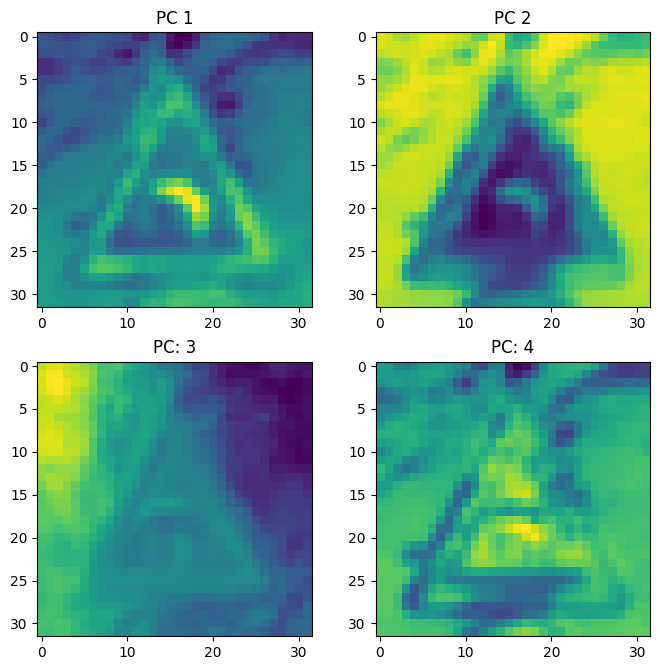

 epoch: 50, train accuracy: 0.0
 epoch: 100, train accuracy: 0.0
 epoch: 150, train accuracy: 0.0
 epoch: 200, train accuracy: 0.0
 epoch: 250, train accuracy: 0.0
 epoch: 300, train accuracy: 0.0
 epoch: 500, train accuracy: 0.0
 best test accuracy : 0.0
**********
 epoch: 50, train accuracy: 0.0
 epoch: 100, train accuracy: 0.0
 epoch: 150, train accuracy: 0.0
 epoch: 200, train accuracy: 0.0
 epoch: 250, train accuracy: 0.0
 epoch: 300, train accuracy: 0.0
 epoch: 500, train accuracy: 0.0
 best test accuracy : nan
**********
 epoch: 50, train accuracy: 0.0
 epoch: 100, train accuracy: 0.0
 epoch: 150, train accuracy: 0.0
 epoch: 200, train accuracy: 0.0
 epoch: 250, train accuracy: 0.0
 epoch: 300, train accuracy: 0.0
 epoch: 500, train accuracy: 0.0
 best test accuracy : nan
**********
 epoch: 50, train accuracy: 0.0
 epoch: 100, train accuracy: 0.0
 epoch: 150, train accuracy: 0.0
 epoch: 200, train accuracy: 0.0
 epoch: 250, train accuracy: 0.0
 epoch: 300, train accuracy: 0.0
 e

In [107]:
#train 50 epochs as opposed to 300
#learning rate
train_loss_record = []
train_accuracy_record = []
holdout_loss_record = []
holdout_accuracy_record = []
test_accuracy_record = []
Alpha = 0.001
n_components = 120

w = np.random.rand(n_components + 1)
logistic = LogisticRegression(Alpha)
epochs_print = [50, 100, 150, 200, 250, 300,500]
epochs = 500
#fold sets add
first_plot = True
for train, valid, test in generate_k_fold_set((load_data_binary)):
    print("**********")
    train_loss_record = []
    train_accuracy_record = []
    holdout_loss_record = []
    holdout_accuracy_record = []
    test_accuracy = []
    
    #first_plot = True
    train_data, train_label = train
    valid_data, valid_label = valid
    test_data, test_label = test

    pca = PCA(n_components)
    projected = pca.fit_transform(train_data)
    #plot first principle component
    if first_plot == True : 
        pca.plot_PC()
        first_plot = False
    train_d = projected     
    valid_d = pca.transform(valid_data)
    test_d = pca.transform(test_data)
    train_l = np.copy(train_label)//8
    valid_l = np.copy(valid_label)//8
    test_l = np.copy(test_label)//8
    
    for epoch in range(epochs):
        #logistic model 
        train_y = logistic.logistic_model(w, train_d)
        #loss check
        train_loss = logistic.loss_binary(train_y, train_l)
        #gradient check
        train_loss_record.append(train_loss)
        train_accuracy = logistic.check_accuracy(train_y, train_l)
        train_accuracy_record.append(train_accuracy)
        #process for validation sets only checking the accuray, not updating the weight
        holdout_y = logistic.logistic_model(w,valid_d)
        holdout_loss = logistic.loss_binary(holdout_y, valid_l)
        holdout_accuracy = logistic.check_accuracy(holdout_y, valid_l)
        holdout_loss_record.append(holdout_loss)
        holdout_accuracy_record.append(holdout_accuracy)
        #evaluate best option for test sets
        if holdout_accuracy >= max(holdout_accuracy_record):
            best_w = w
            test_y = logistic.logistic_model(best_w, test_d)
            test_accuracy = logistic.check_accuracy(test_y, test_l)

        #update the weight
        w = logistic.update_weight(w,train_d, train_y, train_l)
    
        if (epoch + 1) in epochs_print:
            print(f' epoch: {epoch + 1}, train accuracy: {train_accuracy}')
            
    print(f' best test accuracy : {test_accuracy }')       
